In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\sentiment analysis\Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [6]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [8]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [ ]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word
# Download necessary datasets
nltk.download('stopwords')
nltk.download('wordnet')
# Read dataset (adjust the path if necessary)
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\sentiment analysis\Reviews.csv', nrows=500)
# Ensure column name exists
if 'Text' not in df.columns:
    raise KeyError("Column 'Text' not found in the dataset. Check column names.")
# Lowercase all text
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Remove punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)
# Remove stopwords
stop = set(stopwords.words('english'))  # Use a set for faster lookup
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
# Display first few rows
print(df['Text'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


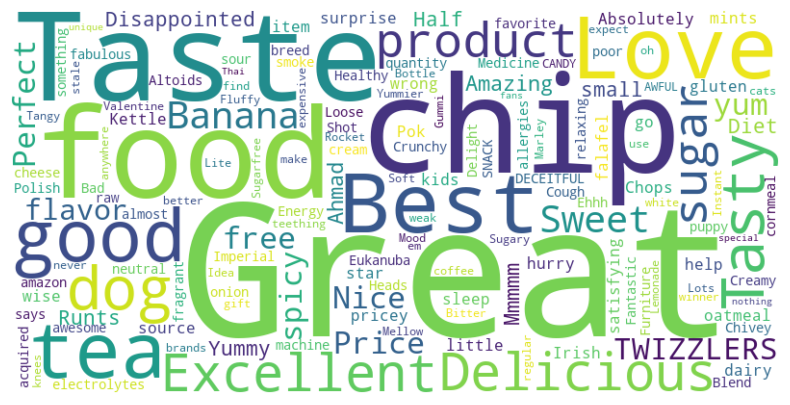

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure dataset is loaded
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\sentiment analysis\Reviews.csv', nrows=500)
# Create a sample of reviews (modify as needed)
reviews_sample = df.sample(100)  # Select 100 random rows
# Fill missing values in 'Summary'
reviews_sample['Summary'] = reviews_sample['Summary'].fillna("")
# Convert 'Summary' column to a single string
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(reviews_str)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [3]:
import pandas as pd
# Load dataset
reviews = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\sentiment analysis\Reviews.csv', nrows=500)
# Ensure 'Score' column exists
if 'Score' not in reviews.columns:
    raise KeyError("Column 'Score' not found in the dataset. Check column names.")
# Drop missing values in 'Score'
reviews = reviews.dropna(subset=['Score'])
# Sample reviews safely
score_1 = reviews[reviews['Score'] == 1].sample(n=min(18, len(reviews[reviews['Score'] == 1])), random_state=42)
score_2 = reviews[reviews['Score'] == 2].sample(n=min(18, len(reviews[reviews['Score'] == 2])), random_state=42)
score_3 = reviews[reviews['Score'] == 3].sample(n=min(18, len(reviews[reviews['Score'] == 3])), random_state=42)
score_4 = reviews[reviews['Score'] == 4].sample(n=min(18, len(reviews[reviews['Score'] == 4])), random_state=42)
score_5 = reviews[reviews['Score'] == 5].sample(n=min(18, len(reviews[reviews['Score'] == 5])), random_state=42)
# Combine samples
balanced_reviews = pd.concat([score_1, score_2, score_3, score_4, score_5])
# Shuffle dataset
balanced_reviews = balanced_reviews.sample(frac=1, random_state=42).reset_index(drop=True)
# Display sample
print(balanced_reviews.head())

    Id   ProductId          UserId                      ProfileName  \
0  452  B000G6RYNE  A2MUGFV2TDQ47K              Lynrie "Oh HELL no"   
1   75  B001EPPI84  A3Q0IDQ03S0158                              Jen   
2    3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  447  B000G6RYNE  A3PZ4AXTY9J1DZ                     Jason Ralsky   
4  418  B000SEJ842  A2IJOBHJXEZSS2                         mosslake   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      3  1288915200   
1                     0                       0      2  1287705600   
2                     1                       1      4  1219017600   
3                     0                       0      4  1295913600   
4                     0                       0      1  1312934400   

                                    Summary  \
0                         An Acquired Taste   
1                           nothing special   
2          

In [5]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


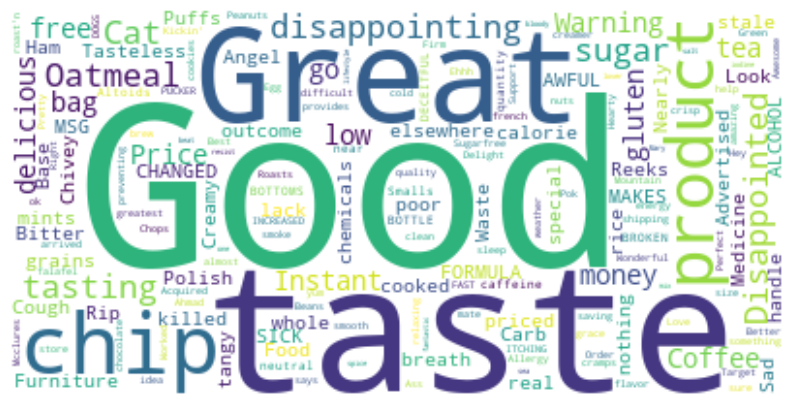

In [7]:
from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.

negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]

positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

 

# Transform to single string

negative_reviews_str = negative_reviews.Summary.str.cat()

positive_reviews_str = positive_reviews.Summary.str.cat()






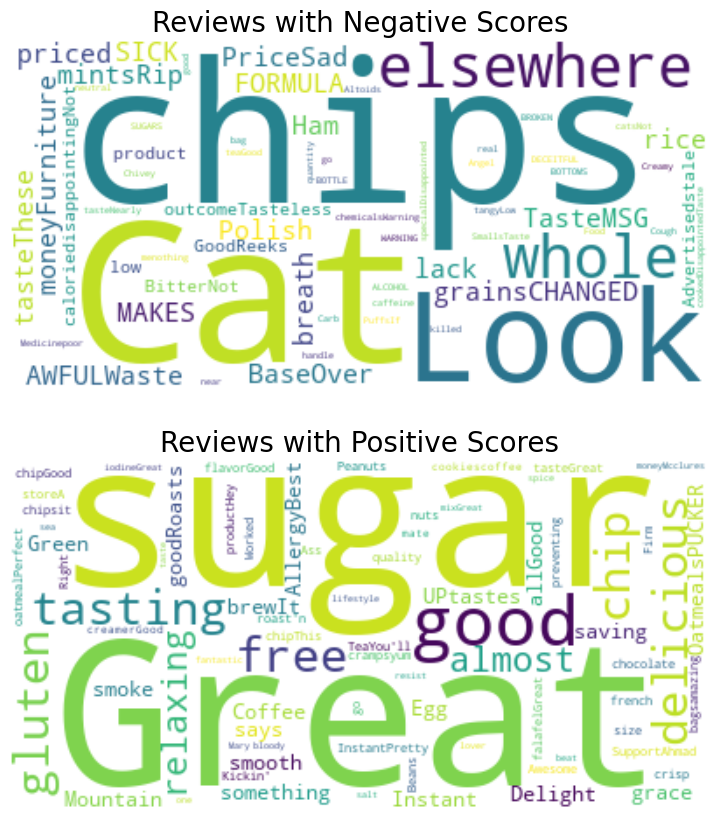

In [13]:
wordcloud_negative = WordCloud(background_color='white') \
.generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white') \
.generate(positive_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [15]:
!pip install vaderSentiment

In [17]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [19]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.085,0.771,0.144,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


In [21]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138


In [28]:
import numpy as np
df_c['Sentiment'] = np.where(df_c['compound'] >= 0, 'positive', 'negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138,positive


Sentiment
positive    453
negative     47
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

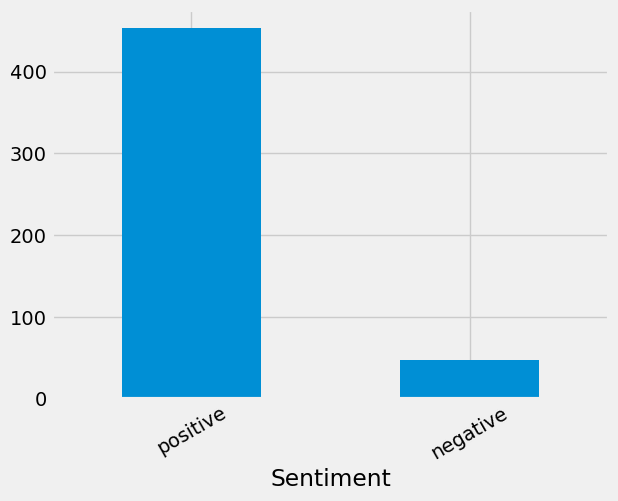

In [30]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)